#### NLP for beginners

In [1]:
import pandas as pd
import numpy as np
import warnings
import re # regular expression libary.
import nltk
import nltk as nlp # Natural Language toolkit
from wordcloud import WordCloud # Most used Words
from nltk.tokenize import word_tokenize,sent_tokenize # word & sentence tokenizer
from nltk.corpus import stopwords 
nltk.download("stopwords")
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data_text.csv")
df.head()

,ID,tweets,label
0,413205,Intravenous azithromycin-induced ototoxicity.,1
1,528244,"Immobilization, while Paget's bone disease was...",1
2,361834,Unaccountable severe hypercalcemia in a patien...,1
3,292240,METHODS: We report two cases of pseudoporphyri...,1
4,467101,METHODS: We report two cases of pseudoporphyri...,1


In [3]:
df.drop(["ID"],axis=1,inplace=True)

In [4]:
df.shape

(23516, 2)

In [5]:
df['label'].value_counts()

0    16694
1     6822
Name: label, dtype: int64

In [7]:
df.isnull().sum() #df.dropna(inplace=True) if any null value

tweets    0
label     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23516 entries, 0 to 23515
Data columns (total 2 columns):
tweets    23516 non-null object
label     23516 non-null int64
dtypes: int64(1), object(1)
memory usage: 367.6+ KB


In [9]:
df=df.head(1000)

### Most used Words

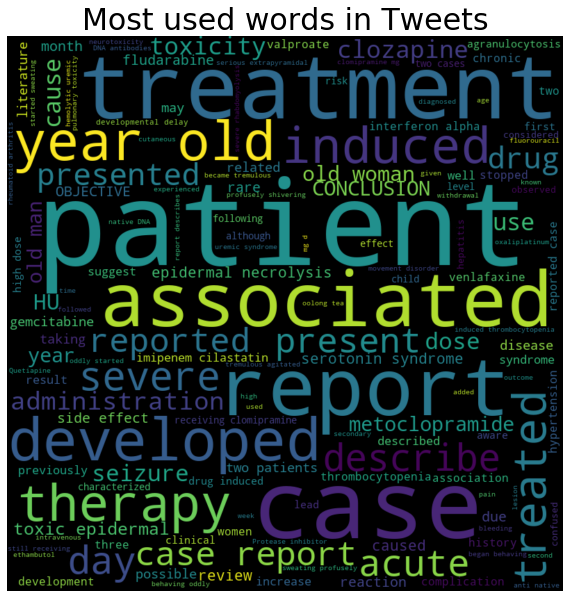

In [11]:
plt.figure(figsize = (8, 8), facecolor = None)
wordcloud=WordCloud(background_color="black",width = 800, height = 800, min_font_size = 10).generate(" ".join(df.tweets[100:]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad = 0) 
plt.title("Most used words in Tweets",fontsize=30)
plt.axis("off")
plt.show()

### Lowercase

In [12]:
df.tweets=df.tweets.apply(lambda x: x.lower())
df.tweets.head()

0        intravenous azithromycin-induced ototoxicity.
1    immobilization, while paget's bone disease was...
2    unaccountable severe hypercalcemia in a patien...
3    methods: we report two cases of pseudoporphyri...
4    methods: we report two cases of pseudoporphyri...
Name: tweets, dtype: object

### Remove digits

In [13]:
df.tweets=df.tweets.apply(lambda x: re.sub(r'\d+',' ', x))
df.tweets.head()       

0        intravenous azithromycin-induced ototoxicity.
1    immobilization, while paget's bone disease was...
2    unaccountable severe hypercalcemia in a patien...
3    methods: we report two cases of pseudoporphyri...
4    methods: we report two cases of pseudoporphyri...
Name: tweets, dtype: object

### Remove punctuations

In [14]:
import string
df.tweets=df.tweets.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '',x))
df.head()

,tweets,label
0,intravenous azithromycininduced ototoxicity,1
1,immobilization while pagets bone disease was p...,1
2,unaccountable severe hypercalcemia in a patien...,1
3,methods we report two cases of pseudoporphyria...,1
4,methods we report two cases of pseudoporphyria...,1


In [15]:
df.tweets=df.tweets.apply(lambda x: re.sub("[^a-zA-Z]"," ",x)) # if expression in the sentence is not a word then this code change them to space.

### Remove Extraspace

In [16]:
df.tweets=df.tweets.apply(lambda x: re.sub(' +',' ',x))
df.head()

,tweets,label
0,intravenous azithromycininduced ototoxicity,1
1,immobilization while pagets bone disease was p...,1
2,unaccountable severe hypercalcemia in a patien...,1
3,methods we report two cases of pseudoporphyria...,1
4,methods we report two cases of pseudoporphyria...,1


### Tokenization

In [17]:
df.tweets=df.tweets.apply(lambda x : word_tokenize(x))
df.head()

,tweets,label
0,"[intravenous, azithromycininduced, ototoxicity]",1
1,"[immobilization, while, pagets, bone, disease,...",1
2,"[unaccountable, severe, hypercalcemia, in, a, ...",1
3,"[methods, we, report, two, cases, of, pseudopo...",1
4,"[methods, we, report, two, cases, of, pseudopo...",1


### Stopword removal 

In [18]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
df['tweets'] = df['tweets'].apply(lambda m: " ".join(m)) 
df.head()

,tweets,label
0,intravenous azithromycininduced ototoxicity,1
1,immobilization while pagets bone disease was p...,1
2,unaccountable severe hypercalcemia in a patien...,1
3,methods we report two cases of pseudoporphyria...,1
4,methods we report two cases of pseudoporphyria...,1


### Stemming

In [20]:
def stem(text):
    ps = nltk.porter.PorterStemmer()
    text=text.split()
    text = ' '.join([ps.stem(word) for word in text])
    return text

df["tweets_stem"]=df.tweets.apply(stem)
df.head()

,tweets,label,tweets_stem
0,intravenous azithromycininduced ototoxicity,1,intraven azithromycininduc ototox
1,immobilization while pagets bone disease was p...,1,immobil while paget bone diseas wa present and...
2,unaccountable severe hypercalcemia in a patien...,1,unaccount sever hypercalcemia in a patient tre...
3,methods we report two cases of pseudoporphyria...,1,method we report two case of pseudoporphyria c...
4,methods we report two cases of pseudoporphyria...,1,method we report two case of pseudoporphyria c...


In [21]:
df.drop(["tweets_stem"],axis=1,inplace=True)

### Lemmatization

In [22]:
def lemma(text):
    lem=WordNetLemmatizer()
    text=text.split()
    text = ' '.join([lem.lemmatize(word) for word in text if word not in set(stopwords.words('english'))])
    return text

df["tweets"]=df.tweets.apply(lemma)
df.head()

,tweets,label
0,intravenous azithromycininduced ototoxicity,1
1,immobilization paget bone disease present perh...,1
2,unaccountable severe hypercalcemia patient tre...,1
3,method report two case pseudoporphyria caused ...,1
4,method report two case pseudoporphyria caused ...,1


### CountVectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer 
max_features=200 # "number" most common(used) words in reviews

count_vectorizer=CountVectorizer(max_features=max_features,stop_words="english") # stop words will be dropped by stopwords command

count_matrix=count_vectorizer.fit_transform(df.tweets).toarray()# this code will create matrix that consist of 0 and 1.

In [24]:
print(count_vectorizer.get_feature_names())

['acid', 'acute', 'administration', 'adverse', 'agitated', 'agitation', 'agranulocytosis', 'allergic', 'angioedema', 'antibody', 'arthritis', 'associated', 'association', 'author', 'aware', 'background', 'began', 'behaving', 'bile', 'bleomycin', 'caffeine', 'cancer', 'carbamazepine', 'carcinoma', 'case', 'cause', 'caused', 'cell', 'change', 'characterized', 'chemotherapy', 'child', 'chronic', 'cisplatin', 'clinical', 'clomipramine', 'clozapine', 'coadministered', 'colitis', 'combination', 'common', 'complication', 'conclusion', 'confused', 'considered', 'continuous', 'course', 'cutaneous', 'day', 'deficiency', 'delay', 'dermatitis', 'described', 'developed', 'development', 'developmental', 'diagnosed', 'disease', 'disorder', 'dos', 'dose', 'drug', 'effect', 'encephalopathy', 'epidermal', 'episode', 'eruption', 'exposure', 'extrapyramidal', 'factor', 'failure', 'fatal', 'feature', 'female', 'fever', 'field', 'fludarabine', 'followed', 'following', 'gemcitabine', 'hb', 'hepatitis', 'high

In [25]:
count_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Creating the TF-IDF model

In [26]:
X=df["tweets"] 
y=df["label"]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X).toarray()

### Train test split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Building the Model

In [29]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
model1=clf.fit(X_train, y_train)
y_pred1 =model1.predict(X_test) # Making the predictions

In [30]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred1).sum()))

Number of mislabeled points out of a total 300 points : 0


In [31]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy_Score=",accuracy_score(y_test,y_pred1),"\n")

Accuracy_Score= 1.0 



In [32]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
model2=clf.fit(X_train, y_train)
y_pred2 =model2.predict(X_test) # Making the predictions

In [33]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred2).sum()))

Number of mislabeled points out of a total 300 points : 0


In [34]:
print("Accuracy_Score=",accuracy_score(y_test,y_pred2),"\n")

Accuracy_Score= 1.0 



In [35]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
model3=clf.fit(X_train, y_train)
y_pred3=model3.predict(X_test)

In [36]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred3).sum()))

Number of mislabeled points out of a total 300 points : 0


In [37]:
print("Accuracy_Score=",accuracy_score(y_test,y_pred3),"\n")

Accuracy_Score= 1.0 

